## 欠損値の処理

In [1]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [2]:
%autoreload

In [3]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_2022.csv'), index_col=0,  sep="\t")

In [4]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [5]:
df.isnull().sum()

race_id                        0
horse_id                       0
jockey_id                      0
trainer_id                     0
owner_id                       0
rank                           0
frame                          0
number                         0
sex                            0
age                            0
impost                         0
win_odds                       0
popularity                     0
weight                         0
weight_diff                    0
date                           0
race_type                      0
around                      1665
course_len                   349
weather                      335
ground_state                 335
race_class                  7389
place                       2381
reference_date              4713
rank_mean                   4713
rank_min                    4713
rank_max                    4713
rank_std                    9015
n_horses_mean               4713
rank_diff_mean              4717
rank_diff_

In [6]:
df

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,course_len_mode,same_course_len_avg_rank,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5
0,202201010101,2020100678,666,1066,356803,1.0,1,1,0,2,...,1800.0,4.000000,27.0,1.0,467.0,3327.0,174.0,442.0,780.0,3556.0
1,202201010101,2020105743,1091,420,639009,4.0,2,2,0,2,...,1200.0,4.428571,14.0,1.0,216.0,1412.0,195.0,390.0,869.0,4520.0
2,202201010101,2020102526,1170,1005,270006,2.0,3,3,0,2,...,1800.0,4.300000,6.0,0.0,386.0,6962.0,189.0,398.0,515.0,1558.0
3,202201010101,2020102360,1144,431,970006,5.0,4,4,0,2,...,1200.0,5.066667,21.0,1.0,475.0,7902.0,156.0,422.0,667.0,2505.0
4,202201010101,2020102535,1140,1005,270006,3.0,5,5,0,2,...,1800.0,3.250000,13.0,1.0,507.0,8947.0,189.0,457.0,144.0,1241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46835,202210040812,2018103127,1138,1142,184033,11.0,6,11,0,4,...,2000.0,4.000000,43.0,2.0,286.0,3535.0,176.0,421.0,645.0,6194.0
46836,202210040812,2018105295,1141,1137,708800,10.0,7,12,0,4,...,2000.0,6.958333,147.0,3.0,257.0,7660.0,67.0,438.0,764.0,6208.0
46837,202210040812,2019105032,1163,1075,906033,14.0,7,13,0,3,...,2200.0,4.107143,119.0,3.0,498.0,528.0,156.0,462.0,652.0,4239.0
46838,202210040812,2019100579,1193,1149,506800,4.0,8,14,0,3,...,2000.0,6.421053,7.0,0.0,385.0,5723.0,189.0,412.0,212.0,144.0


## モデルの学習 & 予測

In [7]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [8]:
df_23 = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_2023.csv'), index_col=0,  sep="\t")
df_23.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [9]:
with open(os.path.join(local_paths.MODELS_DIR, '2022_model_1_1.pickle'), mode='rb') as f:
  model = pickle.load(f)

## RFmodel

In [10]:
%autoreload

In [11]:
p = predict.RFModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.55, stochastic_variation=False)
pred_df = p.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6660  599]
 [1295  814]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      7259
           1       0.58      0.39      0.46      2109

    accuracy                           0.80      9368
   macro avg       0.71      0.65      0.67      9368
weighted avg       0.78      0.80      0.78      9368

Accuracy: 0.7978223740392827
Feature Importance:
                      feature  importance
6                 popularity    0.147211
5                   win_odds    0.111363
12                   weather    0.039376
10                    around    0.039349
15                     place    0.026741
36  same_course_len_avg_rank    0.026173
16                 rank_mean    0.025679
13              ground_state    0.024394
25                prize_mean    0.024112
38    race_interval_category    0.020949
26                 prize_sum    0.020474
45              date_encoded    0.020156
46          horse_id

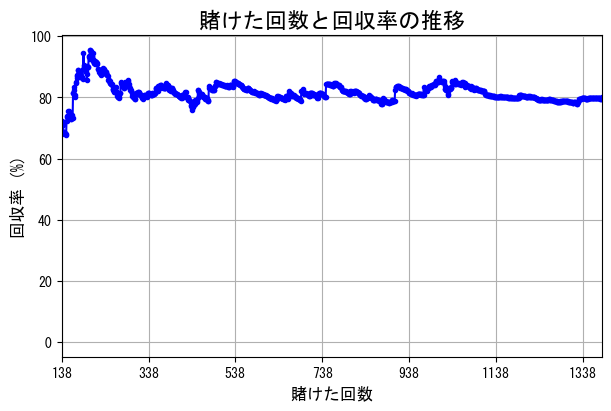

総払い戻し金額: 350960.0円
賭けた回数: 1382回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010105,0.0,100,100,0.0,0.000000
1,202301010106,0.0,100,200,0.0,0.000000
2,202301010109,0.0,100,300,0.0,0.000000
3,202301010203,0.0,100,400,0.0,0.000000
4,202301010205,0.0,100,500,0.0,0.000000
...,...,...,...,...,...,...
1377,202310030704,0.0,100,436500,348100.0,0.797480
1378,202310030705,0.0,1000,437500,348100.0,0.795657
1379,202310030801,0.0,100,437600,348100.0,0.795475
1380,202310030804,0.0,100,437700,348100.0,0.795294


In [12]:
p.plot_returns_rate(df_23)

## NNmodel

In [13]:
%autoreload

In [14]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.55, stochastic_variation=False)
pred_df = nn.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[5668 1591]
 [ 733 1376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      7259
           1       0.46      0.65      0.54      2109

    accuracy                           0.75      9368
   macro avg       0.67      0.72      0.69      9368
weighted avg       0.79      0.75      0.77      9368

Accuracy: 0.7519214346712212
predicted_target
0    32311
1    14962
Name: count, dtype: int64
            race_id    horse_id  jockey_id  trainer_id  owner_id  rank  frame  \
0      202301010101  2021100648       1095        1128    281008   5.0      1   
1      202301010101  2021100159       1157        1186    170800   6.0      2   
2      202301010101  2021100265       1197        1192    320803   7.0      3   
3      202301010101  2021105553       5339        1160    680031   4.0      4   
4      202301010101  2021101429       1170        1026    425031   1.0      5   
...             ...    

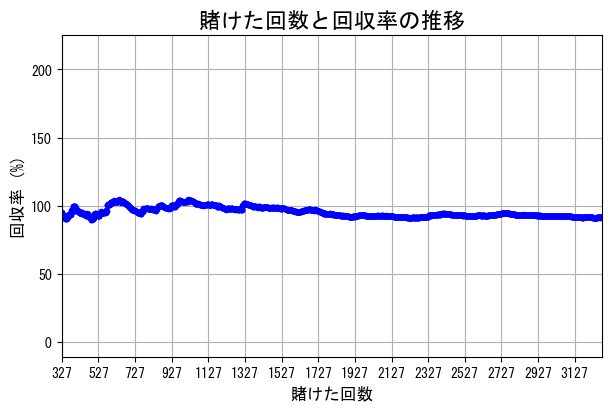

総払い戻し金額: 2461360.0円
賭けた回数: 3274回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010101,0.0,100,100,0.0,0.000000
1,202301010102,0.0,400,500,0.0,0.000000
2,202301010103,1930.0,400,900,1930.0,2.144444
3,202301010104,0.0,100,1000,1930.0,1.930000
4,202301010105,1040.0,400,1400,2970.0,2.121429
...,...,...,...,...,...,...
3269,202310030807,0.0,400,2685200,2458360.0,0.915522
3270,202310030808,0.0,400,2685600,2458360.0,0.915386
3271,202310030809,0.0,400,2686000,2458360.0,0.915249
3272,202310030810,0.0,1000,2687000,2458360.0,0.914909


In [15]:
nn.plot_returns_rate(df_23)

## LGBmodel

In [16]:
%autoreload

In [17]:
lgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.55, stochastic_variation=False)
pred_df = lgb.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 29212, number of negative: 29212
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10874
[LightGBM] [Info] Number of data points in the train set: 58424, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[6786  473]
 [1352  757]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      7259
           1       0.62      0.36      0.45      2109

    accuracy                           0.81      9368
   macro avg       0.72      0.65      0.67      9368
weighted avg       0.78      0.81      0.79      9368

Accuracy: 0.8051878736122972
Feature Importance:
                      feature  importance
38    ra

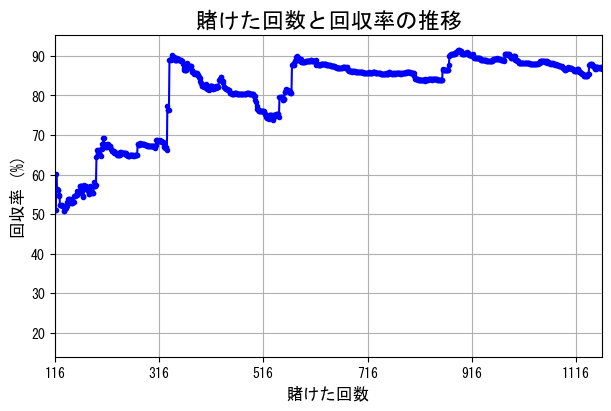

総払い戻し金額: 2060350.0円
賭けた回数: 1165回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010105,1040.0,5600,5600,1040.0,0.185714
1,202301010106,0.0,100,5700,1040.0,0.182456
2,202301010110,0.0,100,5800,1040.0,0.179310
3,202301010203,0.0,100,5900,1040.0,0.176271
4,202301010205,2460.0,2000,7900,3500.0,0.443038
...,...,...,...,...,...,...
1160,202310030504,0.0,400,2346000,2038850.0,0.869075
1161,202310030505,5820.0,8400,2354400,2044670.0,0.868446
1162,202310030605,12820.0,5600,2360000,2057490.0,0.871818
1163,202310030705,0.0,2000,2362000,2057490.0,0.871080


In [18]:
lgb.plot_returns_rate(df_23)

## XGBmodel

In [19]:
%autoreload

In [20]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.55, stochastic_variation=False)
pred_df = xgb.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6799  460]
 [1386  723]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      7259
           1       0.61      0.34      0.44      2109

    accuracy                           0.80      9368
   macro avg       0.72      0.64      0.66      9368
weighted avg       0.78      0.80      0.78      9368

Accuracy: 0.8029461998292058
Feature Importance:
                    feature  importance
6               popularity    0.311632
10                  around    0.098869
12                 weather    0.072382
13            ground_state    0.053142
38  race_interval_category    0.050566
9                race_type    0.044645
31          race_type_mode    0.031154
15                   place    0.030686
4                   impost    0.028070
32       ground_state_mode    0.020126
2                      sex    0.019851
14              race_class    0.018509
0                    frame    0.016927
17     

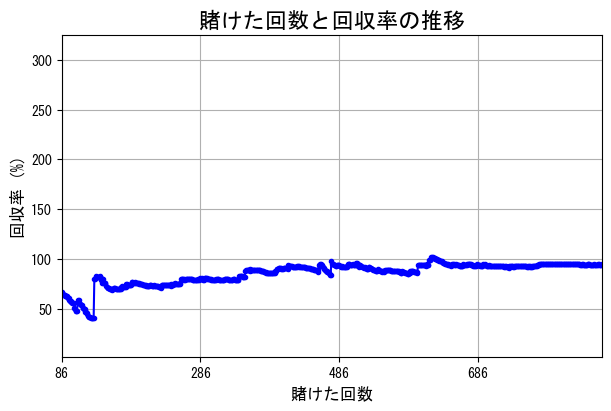

総払い戻し金額: 509620.0円
賭けた回数: 865回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010201,310.0,100,100,310.0,3.100000
1,202301010205,0.0,100,200,310.0,1.550000
2,202301010301,0.0,100,300,310.0,1.033333
3,202301010305,0.0,400,700,310.0,0.442857
4,202301010503,0.0,100,800,310.0,0.387500
...,...,...,...,...,...,...
860,202310030404,0.0,100,536700,506760.0,0.944215
861,202310030405,0.0,100,536800,506760.0,0.944039
862,202310030505,0.0,400,537200,506760.0,0.943336
863,202310030605,0.0,400,537600,506760.0,0.942634


In [21]:
xgb.plot_returns_rate(df_23)

## Ensamblemodel

In [117]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [165]:
%autoreload

In [166]:
en = predict.EnsembleModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = en.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)



モデルの学習


Confusion Matrix:
 [[6471  865]
 [1031 1001]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      7336
           1       0.54      0.49      0.51      2032

    accuracy                           0.80      9368
   macro avg       0.70      0.69      0.69      9368
weighted avg       0.79      0.80      0.79      9368

Accuracy: 0.7976088812980359
Feature Importance:
                      feature  importance
6                 popularity    0.146684
5                   win_odds    0.113472
12                   weather    0.037078
10                    around    0.034678
36  same_course_len_avg_rank    0.027048
16                 rank_mean    0.026088
13              ground_state    0.025822
15                     place    0.024741
38    race_interval_category    0.024012
26                 prize_sum    0.022130
25                prize_mean    0.021018
45              date_encoded    0.019748
21       

In [161]:
pred_df

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,parent_3,parent_4,parent_5,date_encoded,horse_id_encoded,jockey_id_encoded,trainer_id_encoded,owner_id_encoded,predicted_proba,predicted_target
0,202301010101,2021100648,1095,1128,281008,5.0,1,1,1,2,...,436.0,584.0,1852.0,475,8663,47,123,451,0.01,0
1,202301010101,2021100159,1157,1186,170800,6.0,2,2,0,2,...,462.0,780.0,6337.0,475,8467,93,181,289,0.01,0
2,202301010101,2021100265,1197,1192,320803,7.0,3,3,1,2,...,334.0,745.0,6482.0,475,8515,130,187,523,0.00,0
3,202301010101,2021105553,5339,1160,680031,4.0,4,4,1,2,...,406.0,741.0,5141.0,475,10705,150,155,1030,0.04,0
4,202301010101,2021101429,1170,1026,425031,1.0,5,5,0,2,...,329.0,780.0,4573.0,475,8966,105,30,701,0.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,1208,1161,17803,1.0,6,8,1,4,...,301.0,618.0,1738.0,516,2781,141,156,38,0.99,1
47269,202310030812,2020103754,1116,1104,651031,6.0,7,9,0,3,...,337.0,384.0,1551.0,516,6288,59,100,1006,0.00,0
47270,202310030812,2020100400,1193,1092,180800,4.0,7,10,1,3,...,288.0,780.0,6282.0,516,4200,126,88,301,0.04,0
47271,202310030812,2020103663,732,1092,226800,2.0,8,11,2,3,...,288.0,185.0,1206.0,516,6224,9,88,363,0.97,1




モデルの予測


{'rf_0': RandomForestClassifier(random_state=42), 'nn_0': Net(
  (fc1): Linear(in_features=50, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
), 'lgb_0': <lightgbm.basic.Booster object at 0x000001B1E1D7D340>, 'xgb_0': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, m

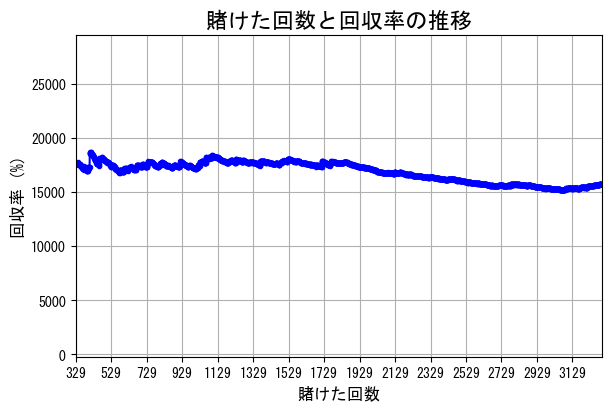

総払い戻し金額: 63671470.0円
賭けた回数: 3294回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010101,1120.0,100,100,1120.0,11.200000
1,202301010102,18440.0,100,200,19560.0,97.800000
2,202301010103,1930.0,100,300,21490.0,71.633333
3,202301010104,7060.0,100,400,28550.0,71.375000
4,202301010105,1040.0,100,500,29590.0,59.180000
...,...,...,...,...,...,...
3289,202310030806,5970.0,100,402800,63644720.0,158.005760
3290,202310030807,10970.0,100,402900,63655690.0,157.993770
3291,202310030808,8280.0,100,403000,63663970.0,157.975112
3292,202310030810,4500.0,100,403100,63668470.0,157.947085


In [162]:
en.plot_returns_rate(df_23)